In [23]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim import similarities
import numpy as np

In [14]:
%matplotlib inline

In [9]:
index = similarities.MatrixSimilarity.load('gensim/tfidf_lsi_similarities.index')

In [17]:
model_array = index.index

In [55]:
reduced_data = PCA(n_components=2).fit_transform(model_array)

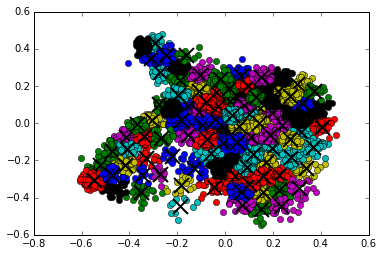

In [57]:
k = 100
km = KMeans(n_clusters=k).fit(reduced_data)
labels = km.labels_
centroids = km.cluster_centers_

for i in range(k):
    # select only data observations with current label
    ds = reduced_data[np.where(labels==i)]
    
    # plot data
    plt.plot(ds[:,0], ds[:,1], 'o')
    
    # plot centroids
    lines = plt.plot(centroids[i,0], centroids[i,1], 'kx')
    
    # make centroid Xs bigger
    plt.setp(lines, ms=15.0)
    plt.setp(lines, mew=2.0)
    
    

In [58]:
metrics.silhouette_score(reduced_data, km.labels_, metric='euclidean', sample_size=model_array.shape[0])

0.34594861

In [59]:
reduced_data

array([[ 0.05262588,  0.12737633],
       [-0.00171633, -0.09883413],
       [-0.04486492,  0.03821679],
       ..., 
       [-0.42677772, -0.103767  ],
       [ 0.36445373, -0.16060446],
       [-0.27718595, -0.09932234]], dtype=float32)

In [ ]:
pd.to_pi